In [1]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import analysis2 as a2
from IPython.display import display, HTML
sys.path.append('/home/janekg89/Develop/Pycharm_Projects/flutype_webapp')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "flutype_webapp.settings")
import django
django.setup()
from flutype.models import Spot

****************************************
RUNNING IN DEVELOP
****************************************


In [2]:
cs = ["slide_21","slide_22","slide_26","slide_27","slide_31","slide_32","slide_36","slide_23","slide_28","slide_33","slide_37"]
[#new anti correlated best
#55,56,59,63,83,94,95,100,121,125,131.2,            11
#strong signal medium anti correlation:
#43,80,98,102,103,Nenad                             5
]
lb = ["P055","P056","P059","P063","P083","P094","P095","P100","P121","P125","P131.2","P043","P080","P098","P102","P103","Nenad"]

spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__sid__in=cs)
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
a = spots_dj
spots_dj = spots_dj.filter(raw_spot__lig_fix_batch__sid__in = lb)
spots_dj = spots_dj.filter(circle_quality__gte = 0.4)


In [3]:
reload(a2)

<module 'analysis2' from '/home/janekg89/Develop/Pycharm_Projects/flutype_analyse_wepdata/analysis2.pyc'>

In [4]:
frames = []


for sample_size in np.unique([int(x) for x in np.logspace(1,7,20,base=2)]):
    data = a2.Data(spots_dj=spots_dj)
    data = data.sample_on_collection(sample_size).clean().norm()
    #ana = a2.Analysis(data, train_test = data.train_test_combinations[:25])
    ana = a2.Analysis(data)
    ana.calculate_all()
    frames.append(ana.all_score())


/home/janekg89/Develop/Pycharm_Projects/flutype_analyse_wepdata/analysis2.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  d["Intensity"] = d["Intensity"]/d[d["Ligand Batch"] == by]["Intensity"].mean()


*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Confusion Matrix*****
*****Score*****
*****Score by Collection*****
*****Majority Score by Collection*****
*****Predictions Count by Collection*****
*****Confusion Matrix by Collection*****
*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Confusion Matrix*****
*****Score*****
*****Score by Collection*****
*****Majority Score by Collection*****
*****Predictions Count by Collection*****
*****Confusion Matrix by Collection*****
*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Confusion Matrix*****
*****Score*****
*****Score by Collection*****
*****Majority Score by Collection*****
*****Predictions Count by Collection*****
*****Confusion Matrix by Collection*****
*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Confusion Matrix*****
*****Score*****
*****Score by Collection*****
*****Majority Score by Collection*****
*****Predictions Count by Collectio

In [5]:
result = pd.concat(frames , keys =  np.logspace(1,7,20,base=2))
result.index.names = ["Sample Size",'Classifier Name', 'Analyte Batch']


In [6]:
import matplotlib.cm as cm

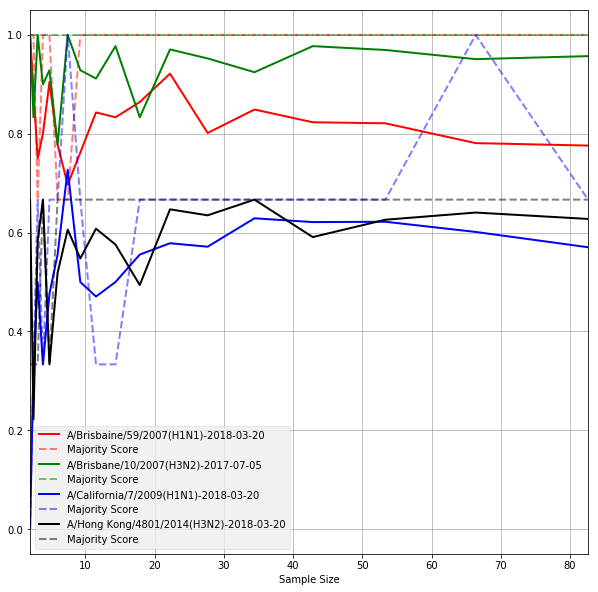

In [7]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))
#mpl.style.use('seaborn')
mpl.style.use('bmh')
colors = cm.rainbow(np.linspace(0, 1, 4))
colors = ["r","g","b","k"]
for (n, d),c in zip(result.reset_index().groupby(["Analyte Batch"]),colors):
    d.plot(x="Sample Size",y="Score", ax=ax,label=n, color=c)
    d.plot(x="Sample Size",y="Majority Score", ax=ax, style="--",color=c ,alpha=0.5)
    
plt.show()
